<a href="https://colab.research.google.com/github/gabmck/cs4410/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabrielle McKeever\
CS 4410 XTIA\
Homework 3\
Exercise 15.8

In [20]:
#import libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


In [21]:
#load iris dataset
iris = load_iris()

X = iris.data
y = iris.target

In [22]:
#define k range
k_range = range(1, 31)

#variables for best k and accuracy
best_k = 0
best_accuracy = 0

#list to store accuracy for each k
accuracy_list = []

#loop through k vals
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    accuracy = np.mean(scores)
    accuracy_list.append(accuracy) #stores accuracy for this k

    #check if accuracy is better than best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

        #print best k and accuracy
        print ("Best k: ", best_k)
        print ("Best accuracy: ", best_accuracy)


Best k:  1
Best accuracy:  0.96
Best k:  3
Best accuracy:  0.9666666666666666
Best k:  5
Best accuracy:  0.9666666666666668
Best k:  9
Best accuracy:  0.9733333333333334
Best k:  13
Best accuracy:  0.9800000000000001


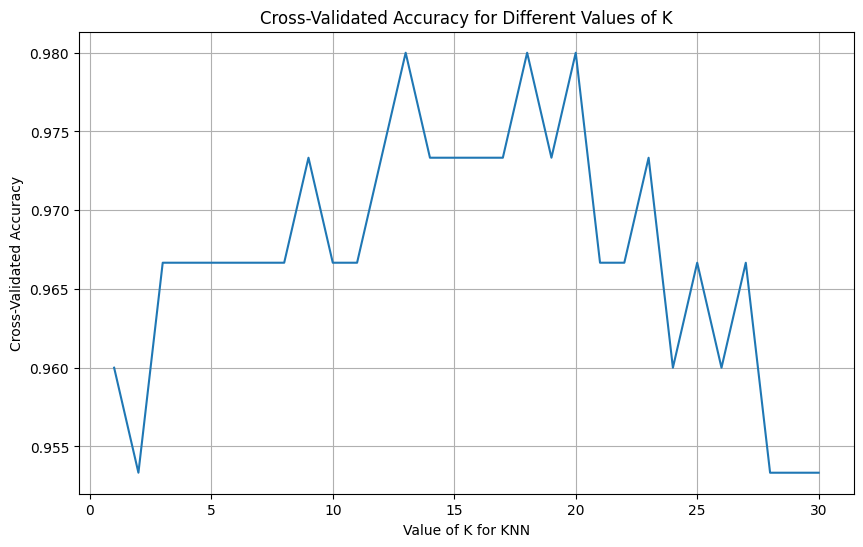

In [23]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validated Accuracy for Different Values of K")
plt.grid(True)
plt.show()

Best k: 13
Best accuracy: 0.9800000000000001


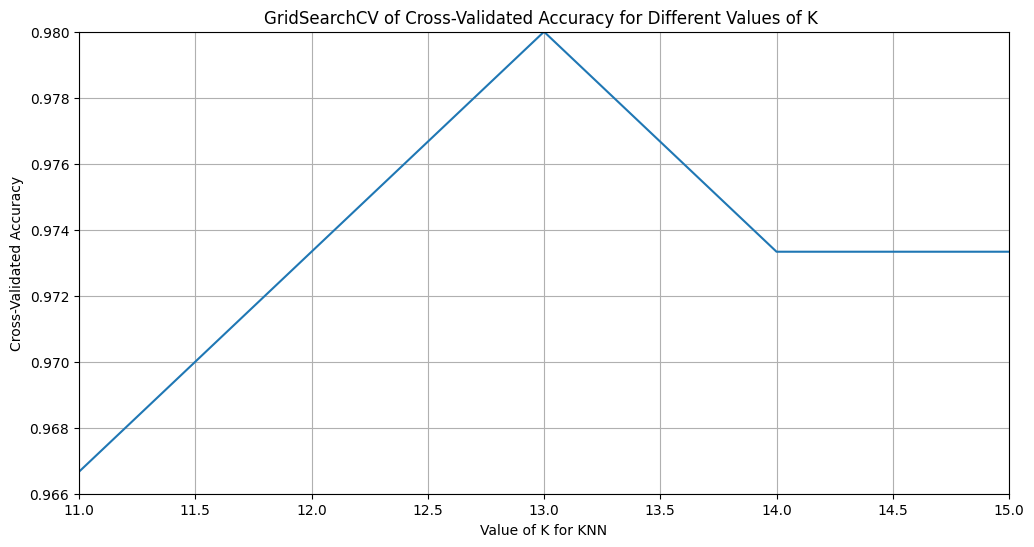

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': k_range}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X, y)

print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)

#plot
plt.figure(figsize=(12, 6))
plt.plot(k_range, grid_search.cv_results_['mean_test_score'])
plt.xlim(11,15)
plt.ylim(0.966,0.980)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("GridSearchCV of Cross-Validated Accuracy for Different Values of K ")
plt.grid(True)
plt.show()